# ***Principle Compoenet Regression[PCR] and Partial Least Square Regression[PLSR]***

>[Principle Compoenet Regression[PCR] and Partial Least Square Regression[PLSR]](#scrollTo=tuiLVkwoAcrn)

>[Objective](#scrollTo=Ev3U7ajkp7ep)

>[Introduction](#scrollTo=k1A4s1UCqNLp)

>[Data description](#scrollTo=ZZEnnWItqWqe)

>>[Exploratory Data Analysis](#scrollTo=x51ZF_dpccM7)

>>[Analysis](#scrollTo=KAvfB35MqeCN)

>[Conclusion](#scrollTo=efpqBkLEUvVH)



# ***Objective***

* Consider data suitable for multiple logistic regression with non-categorical predictors.
* Obtain the mean and covariance matrix of the data.
* Model the data under principal component regression and partial least square regression.
* Draw the plots of eigenvalues (scree plot) under both methodologies in a single plot.
* Draw the plots of eigenvectors under both methodologies.
* Draw the plots of estimated co-efficient in both methodologies.
* Compare the accuracy indicators and confusion matrix

# ***Introduction***

***Principal Component Regression (PCR)*** and ***Partial Least Squares Regression (PLSR)*** are both dimensionality reduction techniques commonly used in regression analysis.

***PCR*** is a technique that combines the principles of principal component analysis (PCA) with multiple linear regression. It involves reducing the dimensionality of the feature space by projecting the original predictors onto a lower-dimensional subspace spanned by the principal components. These principal components are linear combinations of the original predictors and are chosen to maximize the variance explained in the data. PCR then performs linear regression using these principal components as predictors, thus avoiding multicollinearity issues and potentially improving the model's performance.

On the other hand, ***PLSR*** is a technique that aims to find the latent factors (also known as latent variables or components) that explain the maximum covariance between the predictors and the response variable. Unlike PCR, PLSR considers both the predictors and the response variable simultaneously during the dimensionality reduction process. It iteratively constructs a set of latent variables that are linear combinations of the original predictors and are optimized to explain as much variance in both the predictors and the response variable as possible. PLSR then performs linear regression using these latent variables as predictors.

In summary, both PCR and PLSR are effective methods for handling high-dimensional data in regression analysis. While PCR focuses on maximizing variance in the predictors, PLSR aims to maximize covariance between predictors and the response variable. The choice between these techniques depends on the specific characteristics of the dataset and the goals of the analysis.


# ***Data description***


**Data Dictionary**
The dataset encapsulates various health metrics from heart patients, including age, blood pressure, heart rate, and more.

It is taken from Kaggle:

https://www.kaggle.com/code/farzadnekouei/heart-disease-prediction

1. age: age in years

2. sex: sex
*  1 = male
*  0 = female

3. cp: chest pain type
*   Value 0: typical angina
*   Value 1: atypical angina
*   Value 2: non-anginal pain
*   Value 3: asymptomatic

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5. chol: serum cholestoral in mg/dl

6. fbs: (fasting blood sugar > 120 mg/dl)
*   1 = true
*   0 = false

7. restecg: resting electrocardiographic results
*   Value 0: normal
*   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
*   Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalach: maximum heart rate achieved

9. exang: exercise induced angina
*   1 = yes
*   0 = no

10. oldpeak = ST depression induced by exercise relative to rest

11. slope: the slope of the peak exercise ST segment
* Value 0: upsloping
* Value 1: flat
* Value 2: downsloping

12. ca: number of major vessels (0-3) colored by flourosopy
13. thal:
* 0 = error (in the original dataset 0 maps to NaN's)
* 1 = fixed defect
* 2 = normal
* 3 = reversable defect

14. target (the lable):
* 0 = no disease,
* 1 = disease

Diagnosis of heart disease (angiographic disease status)
* Value 0: < 50% diameter narrowing
* Value 1: > 50% diameter narrowing


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

## ***Exploratory Data Analysis***

In [ ]:
# Load the dataset
heart_df=pd.read_csv('/content/drive/MyDrive/StatisticalMachineLearning/Datasets/heart.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Display the first few rows of the dataset
print(heart_df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [ ]:
# Check for missing values
print(heart_df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Summary statistics
print(heart_df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

The above show the summary statistics like mean, standard deviation, minimum and maximum values along with quartiles for all the features.

This helps us to understand the various factors of interest.

In [ ]:
# Distribution of target variable
print(heart_df['target'].value_counts())

target
1    165
0    138
Name: count, dtype: int64


We see that the count of 1[disease] is 165 and 0[no disease] is 138 for the target varible[dependent variable].

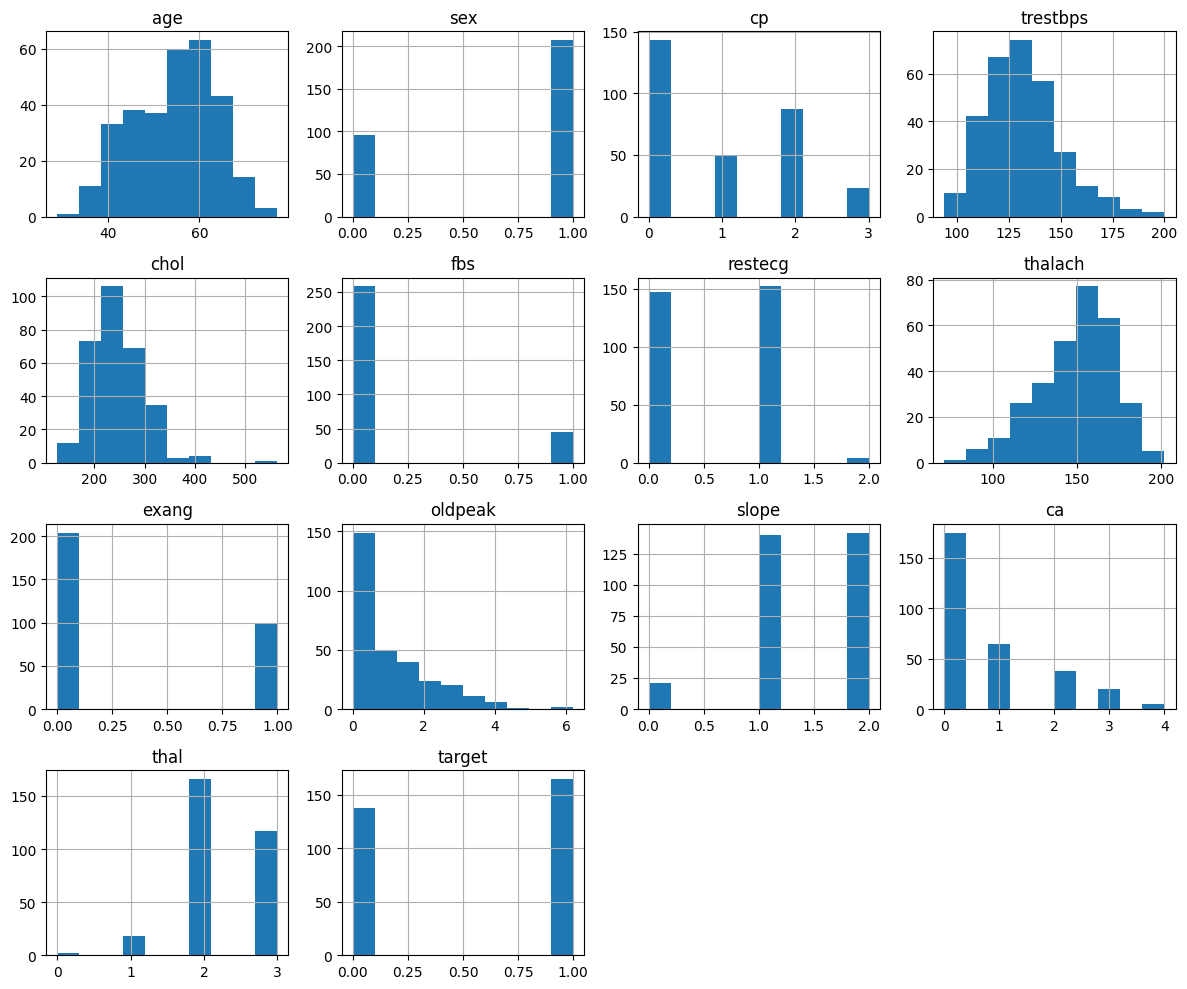

In [ ]:
# Distribution of numerical features
heart_df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

The distribution of the features is displayed above.

1. We observe that age, trestbps, chol, thalach have a normal distribution.

2. oldpeak can have chi-square or f-distribution.

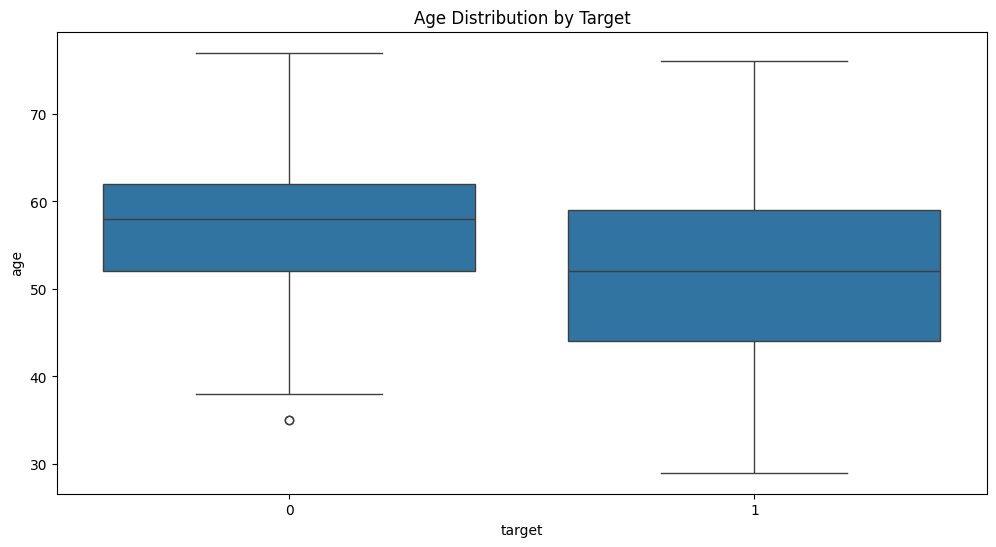

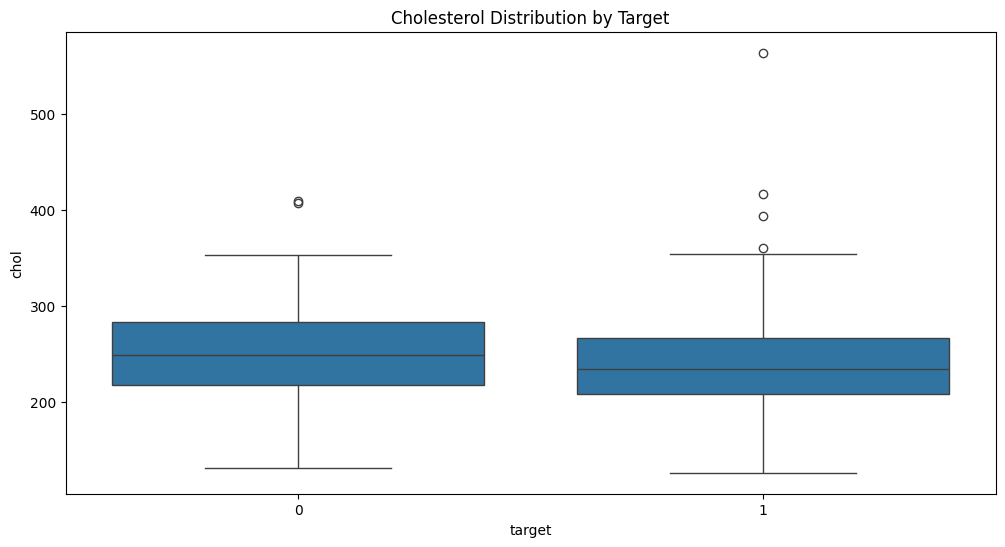

In [ ]:
# Relationship between features and target variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=heart_df, x='target', y='age')
plt.title('Age Distribution by Target')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=heart_df, x='target', y='chol')
plt.title('Cholesterol Distribution by Target')
plt.show()

The above graph shows the relationship of the target variable with age and cholestrol.

People with disease are distributed around the age 45 to 58 and people without disease are distributed around the age 52 to 64 with one outlier of age around 37.

People with disease have a cholestrol level distributed around 210 to 270 mg/dl with few outliers around 350, 400, 405, 550 mg/dl and people without disease have a cholestrol level distributed around 215 to 290 mg/dl with few outliers around 420 mg/dl.

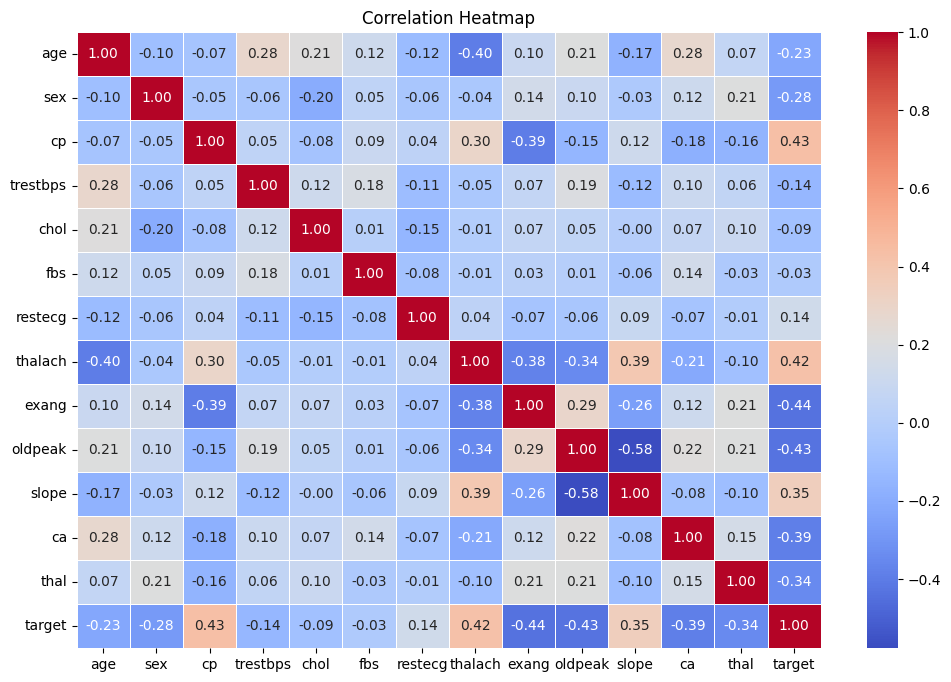

In [ ]:
# Explore correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(heart_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The above gives the numerical correlation between the features.

The highest correlation is 0.43 between cp and target. The second highest correlation is 0.42 between thalach and target.

## ***Analysis***

**Consider data suitable for multiple logistic regression with non-categorical predictors.**

In [ ]:
# Segregation of variables
X = heart_df.loc[:,'age':'thal'] # idependent variables[features]
y = heart_df['target'] # dependent variable [variable of interest]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The training and testing dataset ratio is 80:20.

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Fit logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

**Obtain the mean and covariance matrix of the data.**

In [ ]:
# Mean and covariance matrix of the data
mean_X = np.mean(X_train_scaled, axis=0)
covariance_X = np.cov(X_train_scaled, rowvar=False)

print("Mean of the data:")
print(mean_X)
print("\nCovariance matrix of the data:")
print(covariance_X)

Mean of the data:
[-9.17539690e-18 -8.80838102e-17 -3.67015876e-17  6.93660005e-16
 -2.86272383e-16 -7.34031752e-18 -1.43136192e-16  3.22973971e-16
 -4.03717464e-17 -5.87225401e-17  1.22950318e-16  9.08364293e-17
 -3.94542067e-16]

Covariance matrix of the data:
[[ 1.00414938 -0.09952606 -0.1036234   0.28640728  0.23288417  0.13199597
  -0.12802917 -0.39802225  0.14874258  0.2031921  -0.16402315  0.29868306
   0.06419809]
 [-0.09952606  1.00414938 -0.04870633 -0.09429101 -0.20689082  0.04269094
  -0.05022393 -0.03307206  0.15190767  0.15012601 -0.04347712  0.15553965
   0.22180862]
 [-0.1036234  -0.04870633  1.00414938  0.0289876  -0.0731141   0.16129351
   0.00850769  0.29189977 -0.36246378 -0.14366443  0.11293172 -0.15481191
  -0.18799824]
 [ 0.28640728 -0.09429101  0.0289876   1.00414938  0.1482769   0.186936
  -0.06776454 -0.03779375  0.0589172   0.13299112 -0.03979043  0.0571546
   0.00656946]
 [ 0.23288417 -0.20689082 -0.0731141   0.1482769   1.00414938  0.05063491
  -0.13122642 

The mean for all the features along with their corresponding covariance matrices are displayed above.

We use the scaled training set of features[X] to get the mean and covariance.

**Model the data under principal component regression and partial least square regression.**

In [ ]:
# Principal Component Regression (PCR)
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test.pca = pca.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
<ipython-input-15-ecbaba6f7347>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X_test.pca = pca.transform(X_test)


In [ ]:
#Partial Least Squares Regression (PLS)
pls = PLSRegression(n_components=2)
pls.fit(X_train_scaled, y_train)
X_train_pls = pls.transform(X_train_scaled)
X_test_pls = pls.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PLSRegression was fitted without feature names
  warnings.warn(


In [ ]:
# Fit Logistic Regression on PCA-transformed data (PCR)
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train)

# Fit Logistic Regression on PLS-transformed data (PLSR)
log_reg_pls = LogisticRegression()
log_reg_pls.fit(X_train_pls, y_train)

LogisticRegression()

After performing the PCR and PLSR, we fit logistic regression for the PCR and PLSR transformed data.

**Draw the plots of eigenvalues (scree plot) under both methodologies in a single plot.**

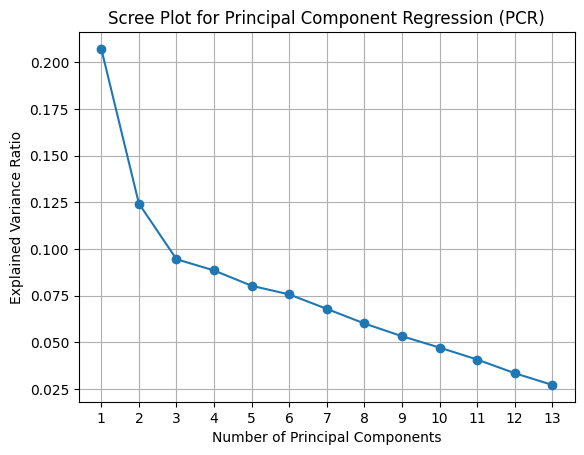

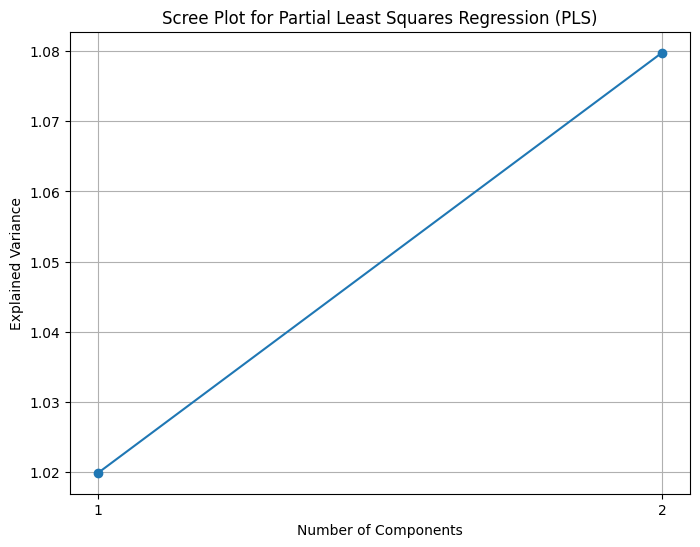

In [ ]:
# Scree plot for PCR
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Scree Plot for Principal Component Regression (PCR)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()

# Calculate the squared loadings of X
squared_loadings = np.square(pls.x_loadings_)

# Calculate the explained variance for each component
explained_variance = np.sum(squared_loadings, axis=0)

# Scree plot for PLS
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.title('Scree Plot for Partial Least Squares Regression (PLS)')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.xticks(np.arange(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

The above two plots are the screem plots for the number of compenents[principle components] on the x-axis and the explained variance ratio on the y-axis.

For PCR, we see that the explanied variance ratio decreases as the number of components inreases for the model.

On the other hand, for PLSR it is the reverse of PCR. It should be noted that the explianed variance increases but in a negligible range.

So, it should not be a hinderence for the further analysis.

In [ ]:
# Evaluate PLS regression
y_pred_pls_train = pls.predict(X_train_scaled)
pls_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_pls_train))
pls_r2_train = r2_score(y_train, y_pred_pls_train)

print("PLS Regression Training Set Metrics:")
print("RMSE:", pls_rmse_train)
print("R^2:", pls_r2_train)

PLS Regression Training Set Metrics:
RMSE: 0.3499132078701373
R^2: 0.5053781875457043


We evaluate the PLS Regression training set metrics.

The residual mean square error[RMSE] is 0.3499

The R-squared value is 0.5054.\
In other words, 50.54% of total variation is explained by the features for the variable of interest. That is 50.54% of the total variation is explained by the features for the target variable.

**Draw the plots of eigenvectors under both methodologies.**

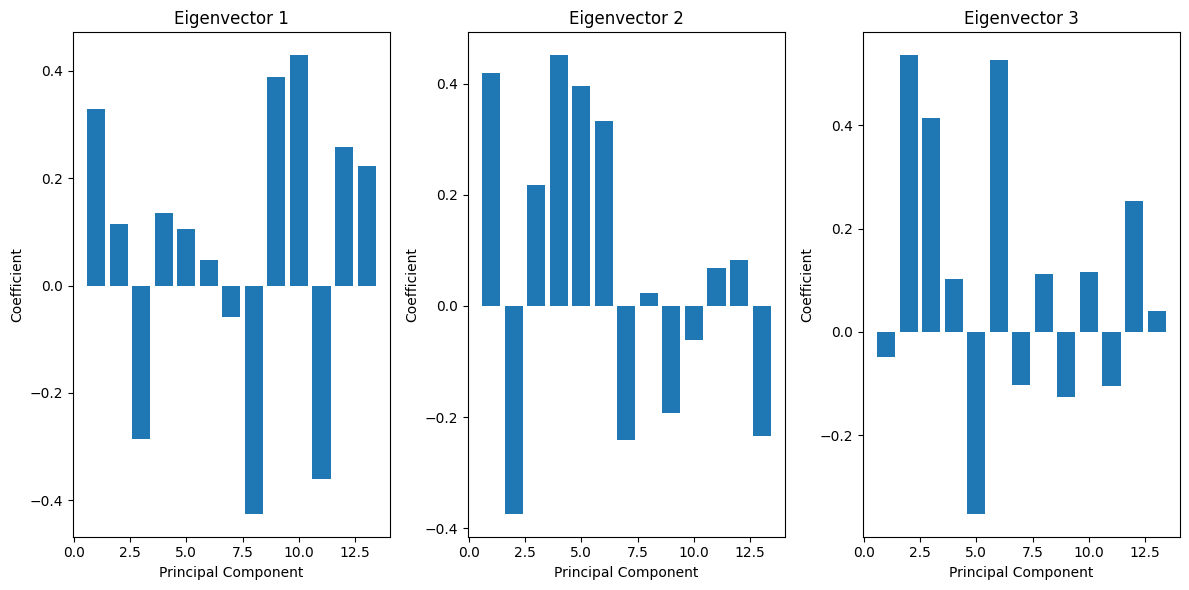

In [ ]:
# Eigenvectors for PCR
plt.figure(figsize=(12, 6))
for i in range(min(3, X_train_pca.shape[1])):
    plt.subplot(1, 3, i+1)
    plt.bar(np.arange(1, X_train_pca.shape[1]+1), pca.components_[i])
    plt.title(f'Eigenvector {i+1}')
    plt.xlabel('Principal Component')
    plt.ylabel('Coefficient')
plt.tight_layout()
plt.show()

The above graph displays the eigenvectors for the PCR.

We have three eigenvectors. Principle components are taken on x-axis and coefficients on the y-axis.

We see that for the eigenvector 1 the highest coefficient is 0.43 for the 10th component and the least being -0.43 for the 8th componenet.

The same can be observed for the other eigenvectors.

/usr/local/lib/python3.10/dist-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


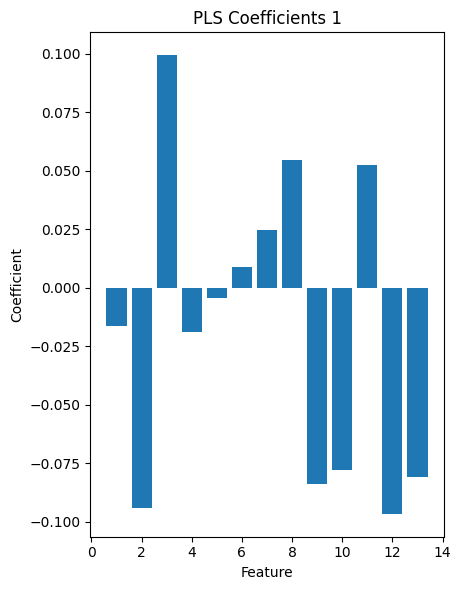

In [ ]:
# Eigenvectors for PLS
plt.figure(figsize=(12, 6))
for i in range(min(3, pls.coef_.shape[1])):
    plt.subplot(1, 3, i+1)
    plt.bar(np.arange(1, X_train_scaled.shape[1]+1), pls.coef_[:, i])
    plt.title(f'PLS Coefficients {i+1}')
    plt.xlabel('Feature')
    plt.ylabel('Coefficient')
plt.tight_layout()
plt.show()

The above is the graph for PLSR.

We have the highest coefficient of 0.1 for 3rd compenent and the least being  -0.1 for the 12th component.

**Get the estimated co-efficient of both methodologies.**

In [ ]:
# Estimated Coefficients for PCR
print("Estimated Coefficients for PCR:")
print(pca.components_)

Estimated Coefficients for PCR:
[[ 0.32918374  0.11419224 -0.28526613  0.13535483  0.10536603  0.04762289
  -0.05838494 -0.42507576  0.388118    0.4287564  -0.36113798  0.25852784
   0.22295164]
 [ 0.4191217  -0.37417789  0.21760601  0.4509508   0.39624995  0.33296673
  -0.24122858  0.02263802 -0.19320239 -0.06088142  0.06782282  0.08272286
  -0.23357573]
 [-0.04850278  0.53547375  0.41352734  0.1017229  -0.35225138  0.52588214
  -0.10381889  0.11258173 -0.12550599  0.11604055 -0.10434781  0.25257157
   0.03973467]
 [-0.10887619 -0.30053016  0.30167146  0.00986841 -0.20587478  0.00727256
   0.26141358 -0.11892108 -0.0503742   0.31683147 -0.55692917 -0.36646182
  -0.36663856]
 [-0.25046262  0.09161745  0.10787516  0.21193405  0.42516466  0.08160838
  -0.07095939  0.37971921  0.12288842  0.20583408 -0.13945628 -0.45039498
   0.50586745]
 [ 0.09787858 -0.11257626  0.04598974  0.26611914 -0.02620355  0.08867659
   0.86317795  0.03956463 -0.06258905  0.00920439  0.183946    0.18817179
   0.

In [ ]:
# Estimated Coefficients for PLS
print("Estimated Coefficients for PLS:")
print(pls.coef_)

Estimated Coefficients for PLS:
[[-0.01622953]
 [-0.09420083]
 [ 0.0992556 ]
 [-0.01904944]
 [-0.00417432]
 [ 0.00863782]
 [ 0.02459305]
 [ 0.05447159]
 [-0.08380497]
 [-0.07765798]
 [ 0.05249323]
 [-0.09652156]
 [-0.08071344]]


The estimated coefficients for both PCR and PLSR shown in the graph above are printed here as values.

**Compare the accuracy indicators and confusion matrix of PCR and PSLR.**

In [ ]:
# Predictions on test set for PCR
y_pred_pcr = log_reg.predict(X_test.pca)

# Accuracy for PCR
accuracy_pcr = accuracy_score(y_test, y_pred_pcr)
print("Accuracy for PCR:", accuracy_pcr)

# Confusion matrix for PCR
conf_matrix_pcr = confusion_matrix(y_test, y_pred_pcr)
print("\nConfusion Matrix for PCR:")
print(conf_matrix_pcr)

Accuracy for PCR: 0.47540983606557374

Confusion Matrix for PCR:
[[29  0]
 [32  0]]


The accuracy for PCR is 47.54%

From confusion matrix we see that after performing the pCR and modelling it using logistic regression, the model is able to identify as follows

1. There are 29 people without disease and the model is able to predict the same correctly.
2. There are 32 people without disease and the model is predicting it as there is disease.

In [ ]:
# Predictions on test set for PLS
y_pred_pls = log_reg_pls.predict(X_test_pls)

# Accuracy for PLS
accuracy_pls = log_reg_pls.score(X_test_pls, y_test)
print("\nAccuracy for PLS:", accuracy_pls)

# Confusion matrix for PLS
conf_matrix_pls = confusion_matrix(y_test, y_pred_pls)
print("\nConfusion Matrix for PLS:")
print(conf_matrix_pls)


Accuracy for PLS: 0.5409836065573771

Confusion Matrix for PLS:
[[ 1 28]
 [ 0 32]]


The accuracy for PLSR is 54.1%

From confusion matrix we see that after performing the pCR and modelling it using logistic regression, the model is able to identify as follows

1. There is 1 person without disease and the model is able to predict the same correctly.
2. There are 28 people without disease and the model is predicting it as there is disease.
3. There are 32 people with disease and the model is able to predict the same correctly.

In [ ]:
# Fit logistic regression model on original data
log_reg_original = LogisticRegression()
log_reg_original.fit(X_train_scaled, y_train)

# Predictions on test set
y_pred_log_reg_original = log_reg_original.predict(X_test_scaled)

# Accuracy for logistic regression on original data
accuracy_log_reg_original = accuracy_score(y_test, y_pred_log_reg_original)
print("Accuracy for Logistic Regression on Original Data:", accuracy_log_reg_original)

# Confusion matrix for logistic regression on original data
conf_matrix_log_reg_original = confusion_matrix(y_test, y_pred_log_reg_original)
print("\nConfusion Matrix for Logistic Regression on Original Data:")
print(conf_matrix_log_reg_original)


Accuracy for Logistic Regression on Original Data: 0.8524590163934426

Confusion Matrix for Logistic Regression on Original Data:
[[25  4]
 [ 5 27]]


The accuracy for multiple logistic regression is 85.24%

From confusion matrix we see that after performing the pCR and modelling it using logistic regression, the model is able to identify as follows

1. There are 25 people without disease and the model is able to predict the same correctly.
2. There are 4 people without disease and the model is predicting it as there is disease.
3. There are 5 people with disease and the model is predicting it as there is no disease.
4. There are 27 people with disease and the model is able to predict the same correctly.

# ***Conclusion***

We considered a data set 'heartdisease' and considered the categorical variable as dependent variable a fit a multiple logostic regression.

We also performed PCR[Principle Component Regression] and PLSR[Partial Least Square Regression] for the same.

We then transformed the variables and fir logistic regression for the transformed PCR and PLSR fitted data.

We obatined the mean and covarinace of the scaled features.

We then obatnied the screen plots for PCR and PLSR.

We got the estimated coefficients and the eigenvectors for both PCR and PLSR along with the plots.

We obtained the accuracy indicators and confusion matrix for PCR and PLSR and also for multiple logistic regression.


**When compared between PCR and PLSR, we know that in PCR the variable of interest[Y] is not considered, that is the direction of the features alone is regressed. But in PLSR the direction of both the features and the dependent variable is consered. Hence PLSR has an upperhand, which is cleary depicted in the accuray of the model [PCR - 47.54%, PLSR - 54.1%]. The model for PCR has a comparitevly lower accuray when compared with PLSR. Hence we say that the model obatined by performing PLSR is the best fit for the considered dataset. Also when looked into the confusion matrix of both the methodologies, PLSR seems to have a clear explanation.**

***Hence we conclude that the model obtained by performing PLSR is the best fit for the dataset 'heartdisease'.***